In [1]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 4.60 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches


In [3]:
train= pd.read_csv('BCCD_Dataset/test.csv')

In [4]:
train.head()

,filename,cell_type,xmin,xmax,ymin,ymax
0,BloodImage_00000.jpg,WBC,260,491,177,376
1,BloodImage_00000.jpg,RBC,78,184,336,435
2,BloodImage_00000.jpg,RBC,63,169,237,336
3,BloodImage_00000.jpg,RBC,214,320,362,461
4,BloodImage_00000.jpg,RBC,414,506,352,445


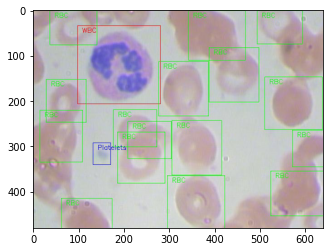

In [5]:
image=plt.imread('BCCD_Dataset/example.jpg')
plt.imshow(image)

In [6]:
train['filename'].nunique()

364

In [7]:
train['cell_type'].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

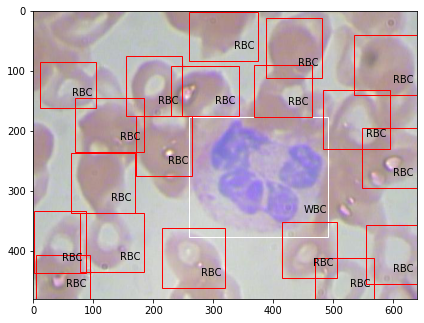

In [8]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])

image=plt.imread('BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg')
plt.imshow(image)

for _,row in train[train.filename=="BloodImage_00000.jpg"].iterrows():
  xmin=row.xmin
  xmax=row.xmax
  ymin=row.ymin
  ymax=row.ymax

  width=xmax-xmin
  height=ymax-ymin

  if row.cell_type== "RBC":
    edgecolor='r'
    ax.annotate('RBC', xy=(xmax-40, ymax-20))
  
  elif row.cell_type=="WBC":
    edgecolor='w'
    ax.annotate('WBC', xy=(xmax-40, ymax-40))
  
  else :
    edgecolor='g'
    ax.annotate('PTS', xy=(xmax-40, ymax-40))

  rect=patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')

  ax.add_patch(rect)
  


In [9]:
!git clone https://github.com/kbardool/keras-frcnn.git

Cloning into 'keras-frcnn'...
remote: Enumerating objects: 589, done.
remote: Total 589 (delta 0), reused 0 (delta 0), pack-reused 589
Receiving objects: 100% (589/589), 173.38 KiB | 327.00 KiB/s, done.
Resolving deltas: 100% (402/402), done.


In [10]:
!ls


BCCD_Dataset  drive  keras-frcnn  sample_data


In [11]:
data=pd.DataFrame()
data['format']=train['filename']
for i in range (data.shape[0]):
  data['format'][i]= 'BCCD_Dataset/BCCD/JPEGImages/'+ data['format'][i]
  data['format'][i]=data['format'][i] +','+str(train['xmin'][i])+','+str(train['ymin'][i])+','+str(train['xmax'][i])+','+str(train['ymax'][i])+','+train['cell_type'][i]
data.to_csv('annotate.txt',header=None)

In [12]:
cd keras-frcnn

/content/keras-frcnn


In [19]:
!python train_frcnn.py -o simple -p annotate.txt

Using TensorFlow backend.
2020-07-17 12:19:47.473253: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "train_frcnn.py", line 15, in <module>
    from keras_frcnn import losses as losses
  File "/content/keras-frcnn/keras_frcnn/losses.py", line 4, in <module>
    if K.image_dim_ordering() == 'tf':
AttributeError: module 'keras.backend' has no attribute 'image_dim_ordering'


In [17]:
from google.colab import files
files.upload()

{}